In [3]:
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import time

from src.data_generation import *

Parameters

In [4]:
n_envs = 5                  # no. of environments
n_traj = 20000             # no. of trajectories per env
timesteps = 250             # no. of timesteps
rayleigh_scale = 0.05        # scale of rayleigh dist
vonmises_kappa = 2 * np.pi  # kappa of vonmises dist

Generate points for deterministic env, None for random shape

In [17]:
points = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1]])
points = None

(<Figure size 500x500 with 1 Axes>, <AxesSubplot:>)

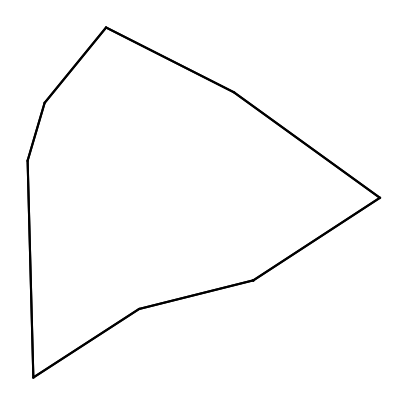

In [21]:
# Generate random env
env = PolygonEnvironment(points=points, add_walls=True, add_holes=True)
env.plot_env()

Generate a couple of random trajectories

In [23]:
# Generate random trajectory
r, v = env.generate_random_trajectories(n_steps=timesteps, n_traj=100, rayleigh_scale=rayleigh_scale, vonmises_kappa=vonmises_kappa)

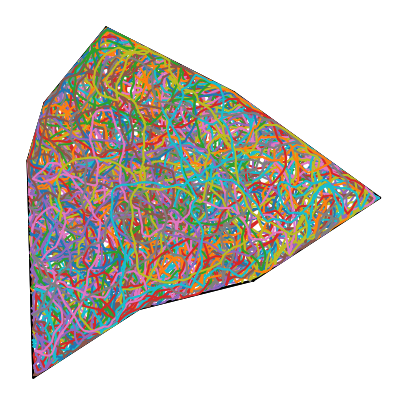

In [25]:
fig, ax = env.plot_env()
ax.plot(*r.numpy()[:].T)
plt.show()

Code to create datasets of random trajectories in random environments

Note: Takes between 300-500 seconds for 20000 trajectories with 250 timesteps each.

In [8]:
ident = datetime.now().strftime("%Y%m%d-%H%M%S") + '_long'
ident = 'random'

off = 5
for i in range(off, off + n_envs):

    # Generate random env
    env = PolygonEnvironment(add_walls=True, add_holes=True)

    # Generate random trajectories
    start = time.time()
    r, v = env.generate_random_trajectories(n_traj=n_traj, n_steps=timesteps, rayleigh_scale=rayleigh_scale, vonmises_kappa=vonmises_kappa)

    # Old version
    # r, v = generate_random_trajectories(env, n_traj=n_traj, timesteps=timesteps, dt=dt, speed_mean=speed_mean)

    print(f'Took {time.time() - start}s to generate {n_traj} trajectories for env {i}')

    # Create dataset
    dataset = TensorDataset(r, v)

    # Save dataset and environment
    torch.save(env, os.path.join('/Users/frederikrogge/Data/bsr/datasets', f'env_{ident}_{i}.pt'))
    torch.save(dataset, os.path.join('/Users/frederikrogge/Data/bsr/datasets', f'dataset_{ident}_{i}.pt'))

Took 420.823114156723s to generate 20000 trajectories for env 5
Took 784.5940947532654s to generate 20000 trajectories for env 6
Took 520.265725851059s to generate 20000 trajectories for env 7
Took 268.6522250175476s to generate 20000 trajectories for env 8
Took 177.1266028881073s to generate 20000 trajectories for env 9


In [2]:
ident = 'random_'
datasets, envs = [], []
for i in range(10):

    # Load an example
    env = torch.load(os.path.join('/Users/frederikrogge/Data/bsr/datasets', 'env_' + ident + str(i) + '.pt'))
    dataset = torch.load(os.path.join('/Users/frederikrogge/Data/bsr/datasets', 'dataset_' + ident + str(i) + '.pt'))

    datasets.append(dataset)
    envs.append(env)

datasets = torch.utils.data.ConcatDataset(datasets)

torch.save(envs, os.path.join('/Users/frederikrogge/Data/bsr/datasets', f'env_mixed.pt'))
torch.save(datasets, os.path.join('/Users/frederikrogge/Data/bsr/datasets', f'dataset_mixed.pt'))

In [65]:
ident = 'random_10'

# Load an example
env = torch.load(os.path.join('/Users/frederikrogge/Data/bsr/datasets', 'env_' + ident + '.pt'))
dataset = torch.load(os.path.join('/Users/frederikrogge/Data/bsr/datasets', 'dataset_' + ident + '.pt'))

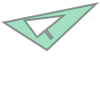

In [66]:
env.polygon

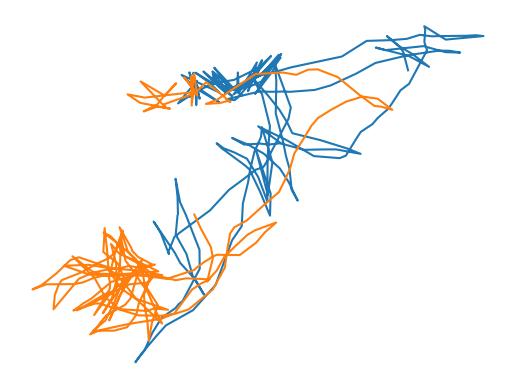

In [67]:
r = dataset.tensors[0].numpy()

fig, ax = plt.subplots()
ax.plot(r[:2, :, 0].T, r[:2, :, 1].T)
ax.axis('off')
plt.show()

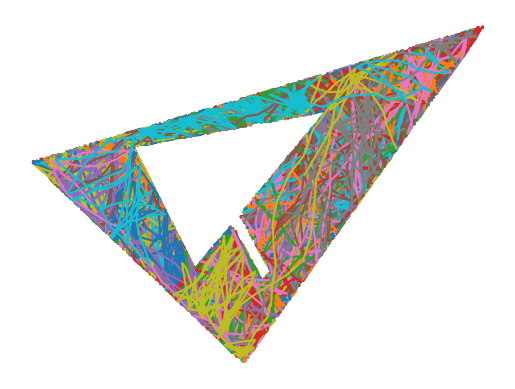

In [68]:
fig, ax = plt.subplots()
ax.plot(r[:200, :, 0].T, r[:200, :, 1].T)
ax.axis('off')
plt.show()